In [1]:
Sys.setlocale(category = "LC_ALL", locale = "en_US.UTF-8")

[1] "en_US.UTF-8/en_US.UTF-8/en_US.UTF-8/C/en_US.UTF-8/C"

# Dependencies

In [2]:
pacman::p_load(dplyr, ggplot2, ggbeeswarm, ggpubr, ggsignif)

# Functions

In [3]:
baseplot_flow.fx <- function(df, x, y, clr, clr_palette, sampletype) {
  if (sampletype == "PBMC") {
    mybreaks <- c(1, 20, 40, 60, 80, 100) }

  myp <- ggplot(
    df,
    aes(x = eval(as.name(x)), y = eval(as.name(y)))
  ) +
    geom_boxplot() + #
    geom_beeswarm(aes(color = eval(as.name(clr))), cex = 2) +
    scale_color_manual(values = clr_palette) +
    myplot +
    myaxis +
    theme(axis.text.x = element_text(angle = 45, hjust = 1), axis.title.x = element_blank()) +
    scale_y_continuous(breaks = mybreaks, labels = mybreaks)
  return(myp)
}


In [4]:
source("/Users/anabbi/git/ped_CapTCRseq/R/ggplot2_theme.R")
source("/Users/anabbi/git/ped_CapTCRseq/R/color_schemes.R")
source("/Users/anabbi/git/ped_CapTCRseq/R/Misc_functions.R")

# Paths

In [5]:
datapath <- "/Users/anabbi/OneDrive - UHN/Documents/INTERCEPT/Data/"
plotpath <- "/Users/anabbi/OneDrive - UHN/Documents/INTERCEPT/Plots/"
manifestpath <- "/Users/anabbi/OneDrive - UHN/Documents/INTERCEPT/Manifests/"
gitpath <- "/Users/anabbi/git/ped_CapTCRseq/"

In [6]:
h4hpath <- "/Users/anabbi/Desktop/H4H/INTERCEPT/"

# Main

In [7]:
meta_div <- readr::read_rds(paste0(datapath, "capTCRseq/meta_div_goodsamples.rds"))

In [8]:
meta_div <- meta_div[ !is.na(meta_div$CD3), ]

In [9]:
meta_div <- meta_div[ meta_div$cancergroup != "Normal", ]
meta_div <- meta_div[ meta_div$cancergroup != "LFS", ]

In [10]:
meta_div$cancergroup[ which(meta_div$cancergroup == "Solid")] <- "Solid tumors"

In [11]:
table(meta_div$sampletype, useNA = "always")


cfDNA  PBMC  <NA> 
  273   456     0 

In [12]:
pbmc <- meta_div[ which(meta_div$sampletype == "PBMC"),]

In [13]:
dim(pbmc)

[1] 456  63

In [14]:
names(group_col)[ names(group_col) == "Solid"] <- "Solid tumors"

In [15]:
pbmc <- pbmc[ pbmc$CD3 > 0,]

In [16]:
dim(pbmc)

[1] 160  63

## rms

In [60]:
pacman::p_load(rms)

In [61]:
colnames(pbmc)

[1] "sample_id"          "Patient"            "cycle"             
 [4] "FOLD"               "ATC"                "Age"               
 [7] "Disease_type"       "TE_fold"            "Pass"              
[10] "CD3"                "EM"                 "CM"                
[13] "Na..ve"             "SCM"                "TE"                
[16] "EM."                "CM."                "Na..ve."           
[19] "SCM."               "TE."                "Na..ve.TE"         
[22] "N.CM.SCM.TE.EM"     "PD.1"               "PDL1"              
[25] "LAG3"               "TIM3"               "CTLA4"             
[28] "PD1."               "PDL1."              "LAG3."             
[31] "TIM3."              "CTLA4."             "Any.NCR"           
[34] "PD1...LAG3...TIM3"  "cancergroup"        "TRB"               
[37] "Reads"              "CPKR"               "Average_reads"     
[40] "VMR"                "Max_reads"          "Singletons"        
[43] "Doubletons"         "qD"                 "Sample_Coverage"   
[46] "observed_Richness"  "estimated_Richness" "SE_Richeness"      
[49] "observed_Shannon"   "estimated_Shannon"  "SE_Shannon"        
[52] "observed_Simpson"   "estimated_Simpson"  "SE_Simpson"        
[55] "file"               "basename"           "Group"             
[58] "sampletype"         "agegroup"           "Cyclegroup"

In [62]:
dd <- datadist(pbmc[ , c("cycle", "Disease_type", "Age", "Na..ve.", "TE.","SCM.", "CM.", "EM.", "cancergroup", "agegroup")])
options(datadist="dd")

In [63]:
options(prType="plain")

In [64]:
f <- ols(Na..ve. ~ cycle + cancergroup + Age, data = pbmc)


In [65]:
f

Frequencies of Missing Values Due to Each Variable
    Na..ve.       cycle cancergroup         Age 
          3           0           0           0 

Linear Regression Model

ols(formula = Na..ve. ~ cycle + cancergroup + Age, data = pbmc)


                 Model Likelihood    Discrimination    
                       Ratio Test           Indexes    
Obs      157    LR chi2     20.16    R2       0.120    
sigma20.4064    d.f.            7    R2 adj   0.079    
d.f.     149    Pr(> chi2) 0.0052    g        8.462    

Residuals

    Min      1Q  Median      3Q     Max 
-31.533 -14.712  -4.469  13.417  57.077 


                         Coef    S.E.   t     Pr(>|t|)
Intercept                31.8870 4.0101  7.95 <0.0001 
cycle=X02                -7.2730 4.5225 -1.61 0.1099  
cycle=X03                -5.2002 4.5648 -1.14 0.2564  
cycle=X04                -8.9495 5.3187 -1.68 0.0945  
cycle=X05                -5.6100 5.6073 -1.00 0.3187  
cancergroup=Lymphoma     -0.9562 5.7967 -0.16 0.8692 

In [66]:
anova(f)

,d.f.,Partial SS,MS,F,P
cycle,4,1735.515,433.8788,1.041927,0.387662509
cancergroup,2,1729.386,864.6932,2.076495,0.128981905
Age,1,3529.126,3529.1260,8.474928,0.004154124
TOTAL,7,8500.730,1214.3901,2.916265,0.006895736
ERROR,149,62046.521,416.4196,NA,NA


In [67]:
f <- ols(Na..ve. ~ cycle + cancergroup + agegroup, data = pbmc)
f

Frequencies of Missing Values Due to Each Variable
    Na..ve.       cycle cancergroup    agegroup 
          3           0           0           0 

Linear Regression Model

ols(formula = Na..ve. ~ cycle + cancergroup + agegroup, data = pbmc)


                 Model Likelihood    Discrimination    
                       Ratio Test           Indexes    
Obs      157    LR chi2     34.50    R2       0.197    
sigma19.6943    d.f.           10    R2 adj   0.142    
d.f.     146    Pr(> chi2) 0.0002    g       10.343    

Residuals

    Min      1Q  Median      3Q     Max 
-35.559 -14.523  -6.462  13.389  55.057 


                         Coef     S.E.   t     Pr(>|t|)
Intercept                 38.4916 4.3130  8.92 <0.0001 
cycle=X02                 -6.2435 4.3724 -1.43 0.1554  
cycle=X03                 -2.4136 4.4494 -0.54 0.5883  
cycle=X04                 -9.5381 5.1378 -1.86 0.0654  
cycle=X05                 -2.7792 5.4709 -0.51 0.6122  
cancergroup=Lymphoma      -5.0934 5.7841 -

## plots for age groups

### PBMC

In [68]:
table(pbmc$agegroup)


  < 2 yrs   2-4 yrs  5-11 yrs 12-17 yrs >= 18 yrs 
       36        22        46        43        13 

In [69]:
pbmc$agegroup <- factor(pbmc$agegroup, levels = c("< 2 yrs", "2-4 yrs", "5-11 yrs", "12-17 yrs", ">= 18 yrs"))

In [70]:
pbmc$Cyclegroup <- NA
pbmc$Cyclegroup[ pbmc$cycle == "X01"] <- "Baseline"
pbmc$Cyclegroup[ pbmc$cycle %in% c("X02", "X03")] <- "Early chemo"
pbmc$Cyclegroup[ pbmc$cycle %in% c("X04", "X05")] <- "Late chemo"

In [114]:
f <- ols(Na..ve. ~  agegroup + cancergroup, data = pbmc[pbmc$Cyclegroup == "Baseline",])
f

Linear Regression Model

ols(formula = Na..ve. ~ agegroup + cancergroup, data = pbmc[pbmc$Cyclegroup == 
    "Baseline", ])

                 Model Likelihood    Discrimination    
                       Ratio Test           Indexes    
Obs       51    LR chi2     23.03    R2       0.363    
sigma19.3141    d.f.            6    R2 adj   0.277    
d.f.      44    Pr(> chi2) 0.0008    g       14.921    

Residuals

    Min      1Q  Median      3Q     Max 
-32.435 -13.274  -2.323  11.431  48.381 


                         Coef     S.E.    t     Pr(>|t|)
Intercept                 31.6319  6.1757  5.12 <0.0001 
agegroup=2-4 yrs         -14.6862 10.0156 -1.47 0.1497  
agegroup=5-11 yrs        -29.0646  7.9668 -3.65 0.0007  
agegroup=12-17 yrs       -20.0530  8.1240 -2.47 0.0175  
agegroup=>= 18 yrs       -21.6792 10.7975 -2.01 0.0508  
cancergroup=Lymphoma      13.6811  9.4233  1.45 0.1536  
cancergroup=Solid tumors  23.9734  6.6584  3.60 0.0008  


In [111]:
f <- ols(Na..ve. ~  agegroup + cancergroup, data = pbmc[pbmc$Cyclegroup == "Early chemo",])
f


Frequencies of Missing Values Due to Each Variable
    Na..ve.    agegroup cancergroup 
          3           0           0 

Linear Regression Model

ols(formula = Na..ve. ~ agegroup + cancergroup, data = pbmc[pbmc$Cyclegroup == 
    "Early chemo", ])


                 Model Likelihood    Discrimination    
                       Ratio Test           Indexes    
Obs       67    LR chi2      7.96    R2       0.112    
sigma19.9060    d.f.            6    R2 adj   0.023    
d.f.      60    Pr(> chi2) 0.2409    g        7.303    

Residuals

    Min      1Q  Median      3Q     Max 
-23.726 -16.246  -5.422  14.657  42.213 


                         Coef     S.E.    t     Pr(>|t|)
Intercept                 32.1550  6.3289  5.08 <0.0001 
agegroup=2-4 yrs          -9.9274  8.1386 -1.22 0.2273  
agegroup=5-11 yrs        -12.8178  7.2311 -1.77 0.0814  
agegroup=12-17 yrs        -7.4430  8.1344 -0.92 0.3639  
agegroup=>= 18 yrs       -10.4624 10.9458 -0.96 0.3430  
cancergroup=Lymphoma     -1

In [113]:
f <- ols(Na..ve. ~  agegroup + cancergroup, data = pbmc[pbmc$Cyclegroup == "Late chemo",])
f

Linear Regression Model

ols(formula = Na..ve. ~ agegroup + cancergroup, data = pbmc[pbmc$Cyclegroup == 
    "Late chemo", ])

                 Model Likelihood    Discrimination    
                       Ratio Test           Indexes    
Obs       39    LR chi2     16.60    R2       0.347    
sigma18.5433    d.f.            6    R2 adj   0.224    
d.f.      32    Pr(> chi2) 0.0109    g       13.520    

Residuals

    Min      1Q  Median      3Q     Max 
-34.856 -12.963  -1.511  12.142  27.963 


                         Coef     S.E.    t     Pr(>|t|)
Intercept                 39.5181  7.1715  5.51 <0.0001 
agegroup=2-4 yrs         -29.1849 11.1491 -2.62 0.0134  
agegroup=5-11 yrs        -21.4562  8.0906 -2.65 0.0123  
agegroup=12-17 yrs       -27.0896  8.8918 -3.05 0.0046  
agegroup=>= 18 yrs       -23.5021 15.6869 -1.50 0.1439  
cancergroup=Lymphoma     -10.6804 11.8023 -0.90 0.3723  
cancergroup=Solid tumors   3.1000  6.5457  0.47 0.6390  


In [119]:
annotation_df <- data.frame(
  Cyclegroup = c("Baseline","Baseline", "Baseline", "Late chemo", "Late chemo", "Late chemo"),
  start = c("< 2 yrs", "< 2 yrs", "< 2 yrs", "< 2 yrs", "< 2 yrs", "< 2 yrs"),
  end = c("5-11 yrs", "12-17 yrs", ">= 18 yrs", "2-4 yrs", "5-11 yrs", "12-17 yrs"),
  y = c(80,90,100,80,90,100),
  label = c("p = 0.0007", "p = 0.02","p = 0.05", "p = 0.01", "p = 0.01", "p = 0.005") )

In [120]:
p_pbmc <- baseplot_flow.fx(pbmc, "agegroup", "Na..ve.", "cancergroup", group_col, "PBMC")

Warning message in geom_signif(data = annotation_df, aes(xmin = start, xmax = end, :
“Ignoring unknown aesthetics: xmin, xmax, annotations, and y_position”
Warning message:
“Removed 3 rows containing non-finite values (`stat_boxplot()`).”
Warning message:
“Removed 3 rows containing missing values (`geom_point()`).”


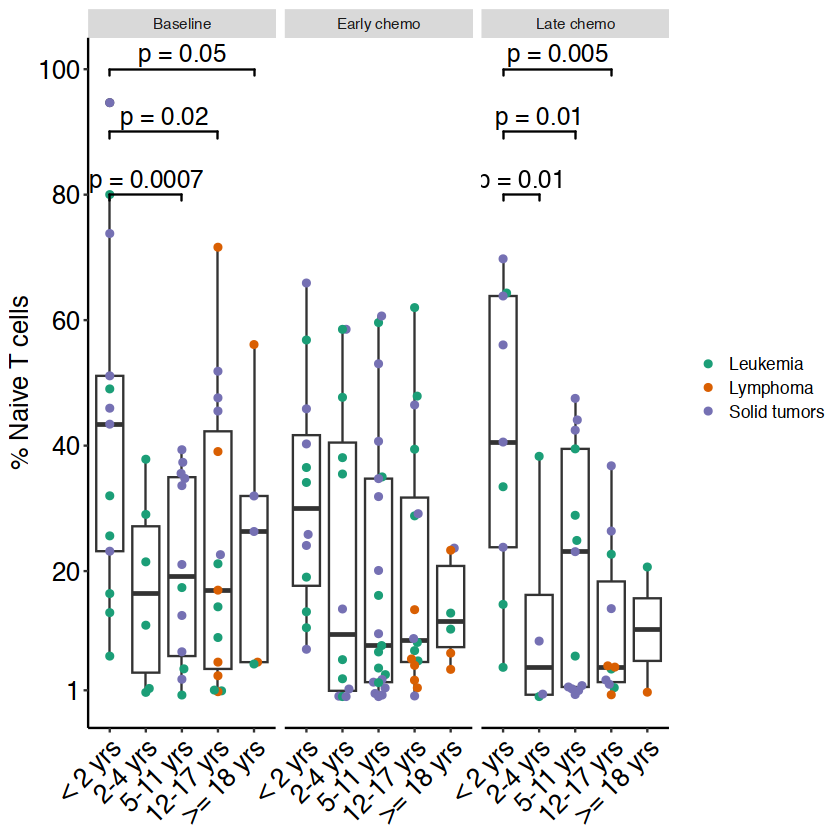

In [121]:
p_pbmc <- p_pbmc + 
geom_signif(
    data = annotation_df,
    aes(xmin = start, xmax = end, annotations = label, y_position = y),
    textsize = 5, vjust = 0, tip_length = 0.01,
    manual = TRUE
  ) +
facet_wrap(~Cyclegroup, nrow = 1) + 
labs( y = "% Naive T cells")

p_pbmc

In [122]:
pdf(paste0(plotpath, "pbmc_Naive_age_facet_cycle.pdf"), width = 8, height = 6)
p_pbmc + theme(legend.position = "bottom")+ 
theme(strip.background = element_blank(),
          strip.text = element_text(size = 15),
          strip.placement = "outside",
          panel.border = element_rect(color = "black", fill = NA, size = 0.5))
dev.off()

Warning message:
“Removed 3 rows containing non-finite values (`stat_boxplot()`).”
Warning message:
“Removed 3 rows containing missing values (`geom_point()`).”


pdf 
  2

## Plots for cancer groups

In [96]:
f <- ols(Na..ve. ~  cancergroup + Age, data = pbmc[pbmc$Cyclegroup == "Baseline",])
f

Linear Regression Model

ols(formula = Na..ve. ~ cancergroup + Age, data = pbmc[pbmc$Cyclegroup == 
    "Baseline", ])

                 Model Likelihood    Discrimination    
                       Ratio Test           Indexes    
Obs       51    LR chi2     13.56    R2       0.233    
sigma20.5062    d.f.            3    R2 adj   0.184    
d.f.      47    Pr(> chi2) 0.0036    g       12.368    

Residuals

    Min      1Q  Median      3Q     Max 
-33.950 -13.923  -1.097   7.718  55.401 


                         Coef    S.E.   t     Pr(>|t|)
Intercept                24.7191 5.3026  4.66 <0.0001 
cancergroup=Lymphoma     17.3274 9.7408  1.78 0.0817  
cancergroup=Solid tumors 21.6641 6.3601  3.41 0.0014  
Age                      -1.0746 0.4886 -2.20 0.0328  


In [97]:
f <- ols(Na..ve. ~  cancergroup + Age, data = pbmc[pbmc$Cyclegroup == "Early chemo",])
f

Frequencies of Missing Values Due to Each Variable
    Na..ve. cancergroup         Age 
          3           0           0 

Linear Regression Model

ols(formula = Na..ve. ~ cancergroup + Age, data = pbmc[pbmc$Cyclegroup == 
    "Early chemo", ])


                 Model Likelihood    Discrimination    
                       Ratio Test           Indexes    
Obs       67    LR chi2      6.19    R2       0.088    
sigma19.6842    d.f.            3    R2 adj   0.045    
d.f.      63    Pr(> chi2) 0.1025    g        6.384    

Residuals

    Min      1Q  Median      3Q     Max 
-27.378 -17.264  -3.955  11.822  42.953 


                         Coef     S.E.   t     Pr(>|t|)
Intercept                 28.5683 4.9851  5.73 <0.0001 
cancergroup=Lymphoma     -11.4171 8.5789 -1.33 0.1880  
cancergroup=Solid tumors  -2.1971 5.1482 -0.43 0.6710  
Age                       -0.5951 0.4487 -1.33 0.1895  


In [98]:
f <- ols(Na..ve. ~  cancergroup + Age, data = pbmc[pbmc$Cyclegroup == "Late chemo",])
f

Linear Regression Model

ols(formula = Na..ve. ~ cancergroup + Age, data = pbmc[pbmc$Cyclegroup == 
    "Late chemo", ])

                 Model Likelihood    Discrimination    
                       Ratio Test           Indexes    
Obs       39    LR chi2     10.40    R2       0.234    
sigma19.1982    d.f.            3    R2 adj   0.168    
d.f.      35    Pr(> chi2) 0.0155    g       11.613    

Residuals

    Min      1Q  Median      3Q     Max 
-31.691 -15.974   2.067  14.746  36.230 


                         Coef    S.E.    t     Pr(>|t|)
Intercept                31.6404  6.4479  4.91 <0.0001 
cancergroup=Lymphoma     -6.7341 11.9246 -0.56 0.5759  
cancergroup=Solid tumors  3.3619  6.6336  0.51 0.6155  
Age                      -1.4598  0.5755 -2.54 0.0158  


In [107]:
annotation_df <- data.frame(
  Cyclegroup = "Baseline",
  start = "Leukemia",
  end = "Solid tumors",
  y = 100,
  label = "p = 0.001" )

In [108]:
p_pbmc <- baseplot_flow.fx(pbmc, "cancergroup", "Na..ve.", "cycle", rep("grey",5), "PBMC")

Warning message in geom_signif(data = annotation_df, aes(xmin = start, xmax = end, :
“Ignoring unknown aesthetics: xmin, xmax, annotations, and y_position”
Warning message:
“Removed 3 rows containing non-finite values (`stat_boxplot()`).”
Warning message:
“Removed 3 rows containing missing values (`geom_point()`).”


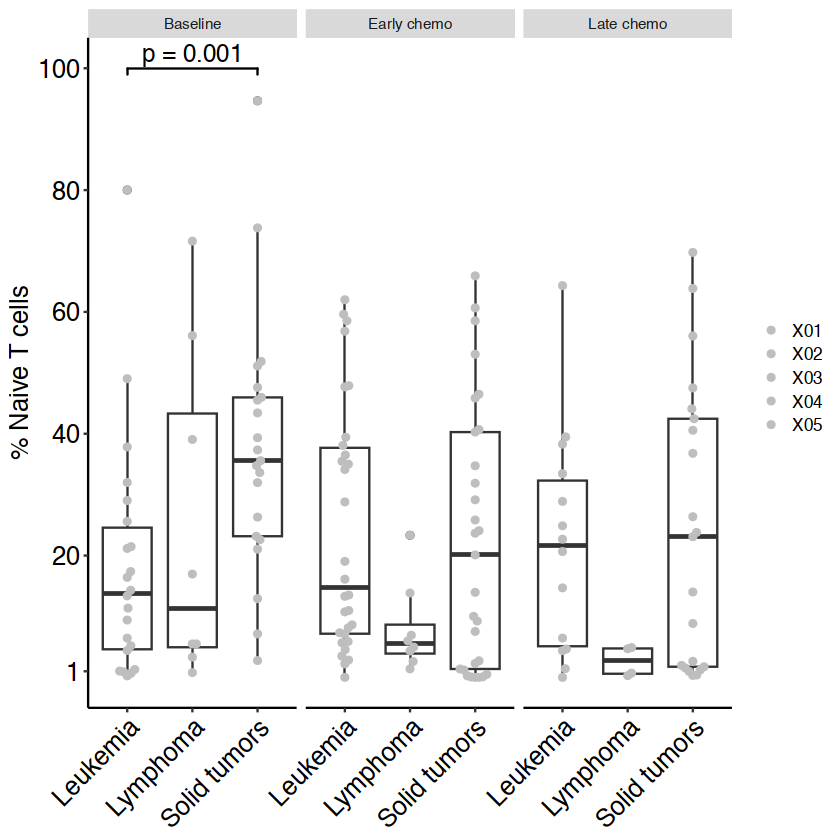

In [109]:
p_pbmc <- p_pbmc + 
geom_signif(
    data = annotation_df,
    aes(xmin = start, xmax = end, annotations = label, y_position = y),
    textsize = 5, vjust = 0, tip_length = 0.01,
    manual = TRUE
  ) +
facet_wrap(~Cyclegroup, nrow = 1) + 
labs( y = "% Naive T cells")

p_pbmc

In [110]:
pdf(paste0(plotpath, "pbmc_Naive_cancergroup_facet.pdf"), width = 8, height = 6)
p_pbmc + theme(legend.position = "none")+ 
theme(strip.background = element_blank(),
          strip.text = element_text(size = 15),
          strip.placement = "outside",
          panel.border = element_rect(color = "black", fill = NA, size = 0.5))
dev.off()

Warning message:
“Removed 3 rows containing non-finite values (`stat_boxplot()`).”
Warning message:
“Removed 3 rows containing missing values (`geom_point()`).”


pdf 
  2